In [1]:
import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns',50)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api

plt.rcParams['figure.figsize'] = [12, 6]

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, StackingClassifier, VotingClassifier
#from xgboost import XGBClassifier

from sklearn.model_selection import validation_curve


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix, precision_score
from sklearn.metrics import recall_score,roc_auc_score,f1_score,roc_curve, confusion_matrix, f1_score

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)



Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


The original dataset can be found here at the UCI Machine Learning Repository.


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

In [4]:
# Dropping ID column, which is not signinficant in our analysis.
df=df.drop('ID',axis=1)

In [5]:
# Summary of the data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

In [6]:
# Some Bill Amount is in negative, means they pre loaded the credit card, need to check.

In [7]:
#  we can interpret -2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only)

In [8]:
# Checking missing values.

df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No missing values in the dataset

In [9]:
df_num=df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

df_cat=df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

for i in df_cat.columns:
    print(i,df_cat[i].unique())
    print('\n')

SEX [2 1]


EDUCATION [2 1 3 5 4 6 0]


MARRIAGE [1 2 3 0]


PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]


PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]


PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]


PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]


PAY_5 [-2  0 -1  2  3  5  4  7  8  6]


PAY_6 [-2  2  0 -1  3  6  4  7  8  5]




In [10]:
df.rename(columns={"default.payment.next.month": "Default"},inplace=True)
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)
df['SEX']=df['SEX'].replace([1,2],[1,0])

In [11]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
# As there is no information given of education category 0, 5, 6. So we club category 0,5,6 with 4.

df['EDUCATION']=df['EDUCATION'].apply(lambda x : 4 if (x>=4 or x==0) else x)

In [13]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
# No information given on categry 0 of MARRIAGE column so we club it with category 3.
df['MARRIAGE']=df['MARRIAGE'].apply(lambda x : 3 if x==0 else x)

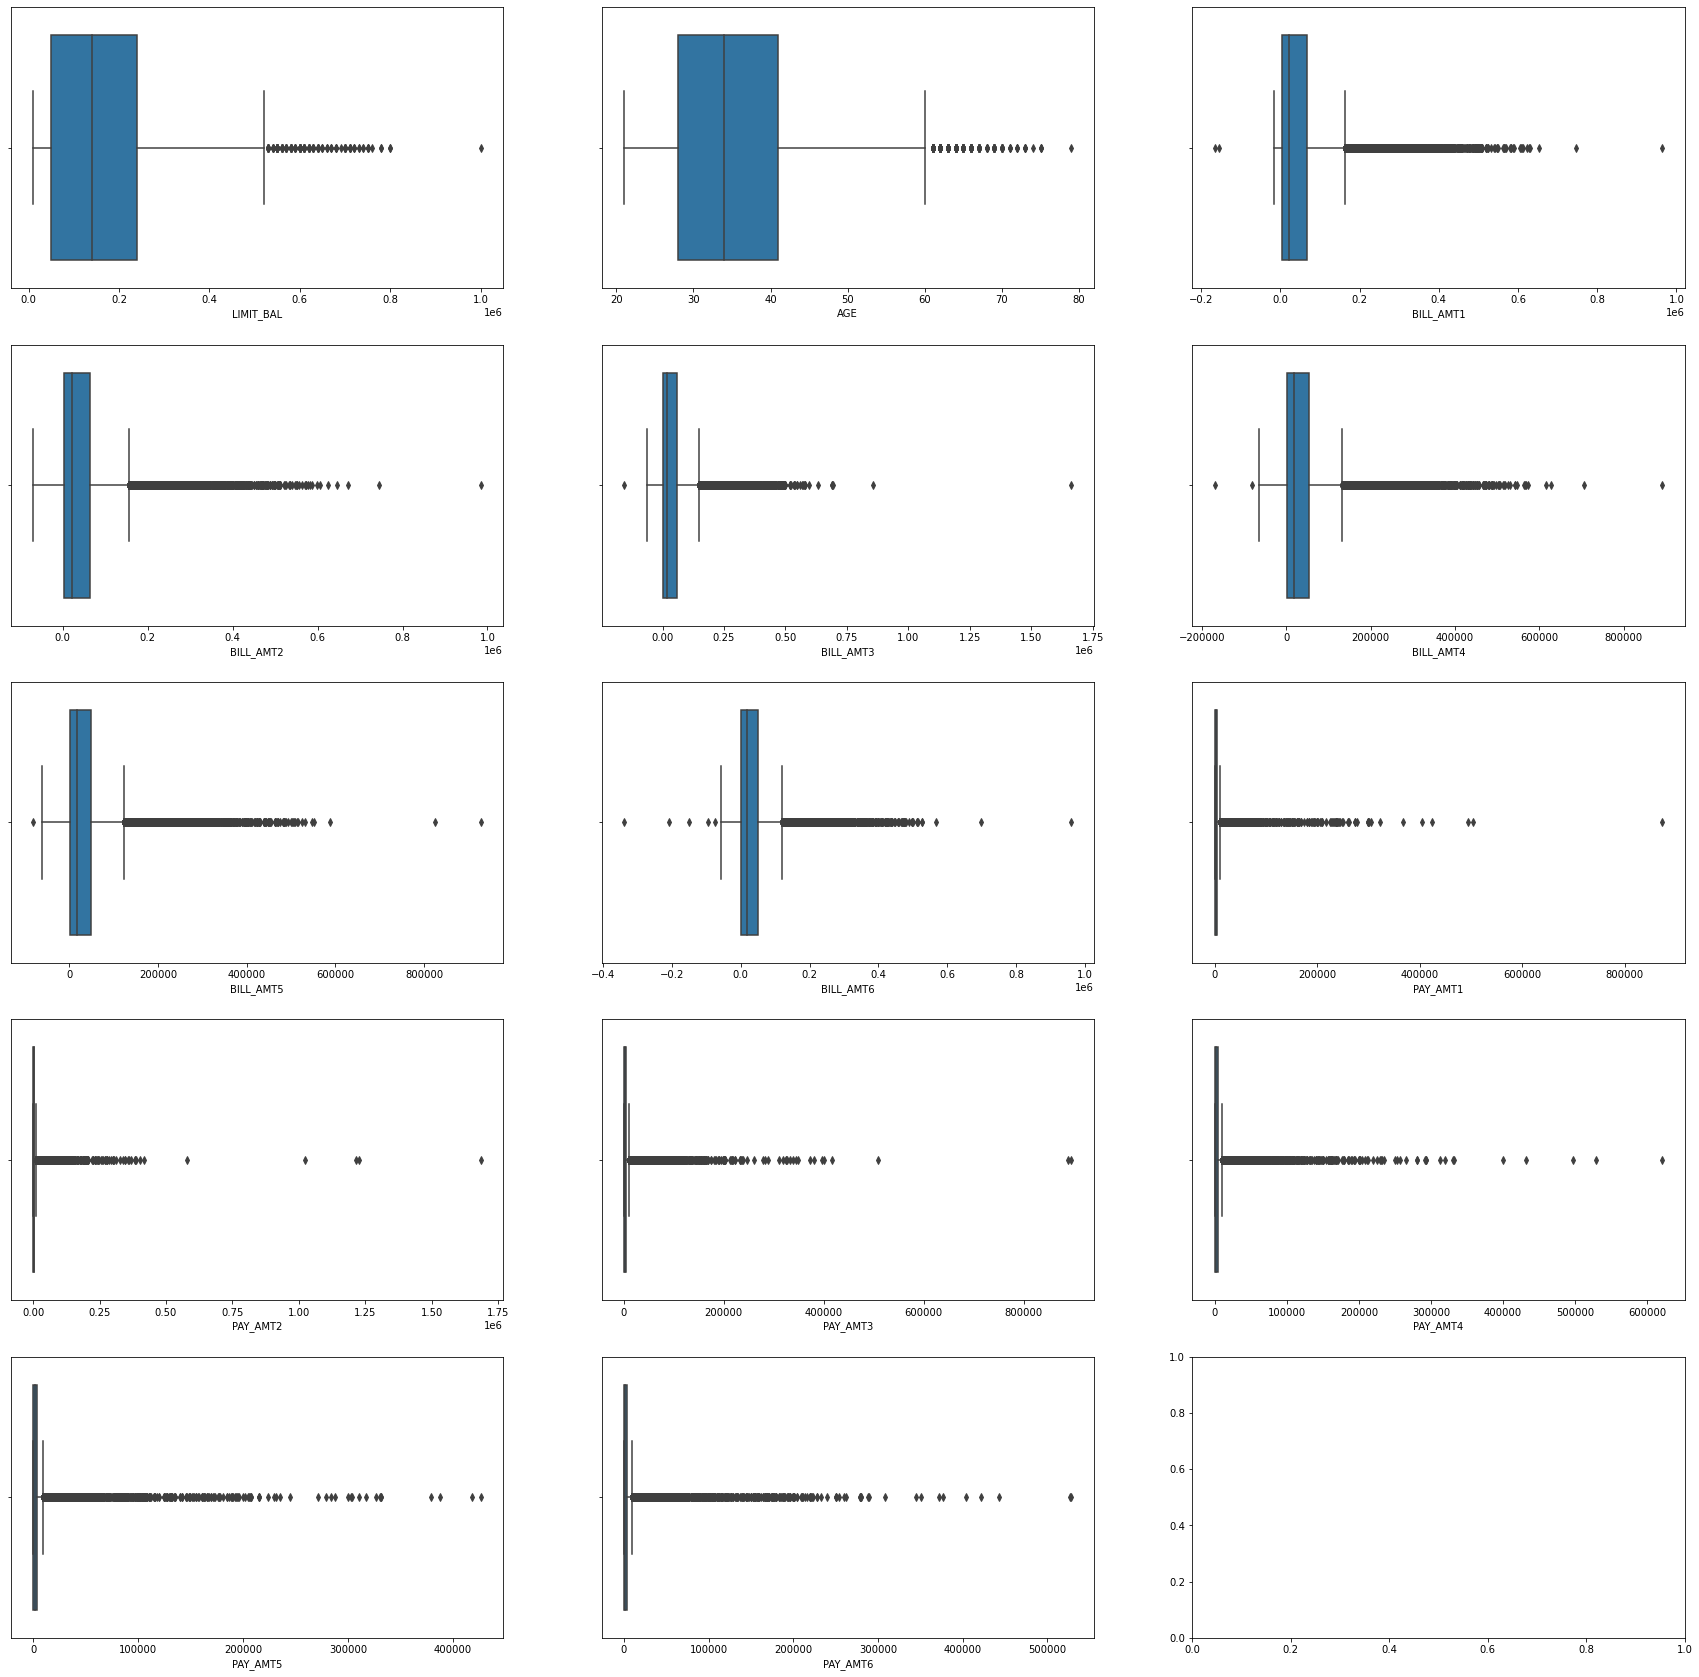

In [15]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(30, 30))

for variable, subplot in zip(df_num.columns, ax.flatten()):   
    sns.boxplot(df_num[variable], ax = subplot)
    
plt.show()

## Data Analysis

<AxesSubplot:>

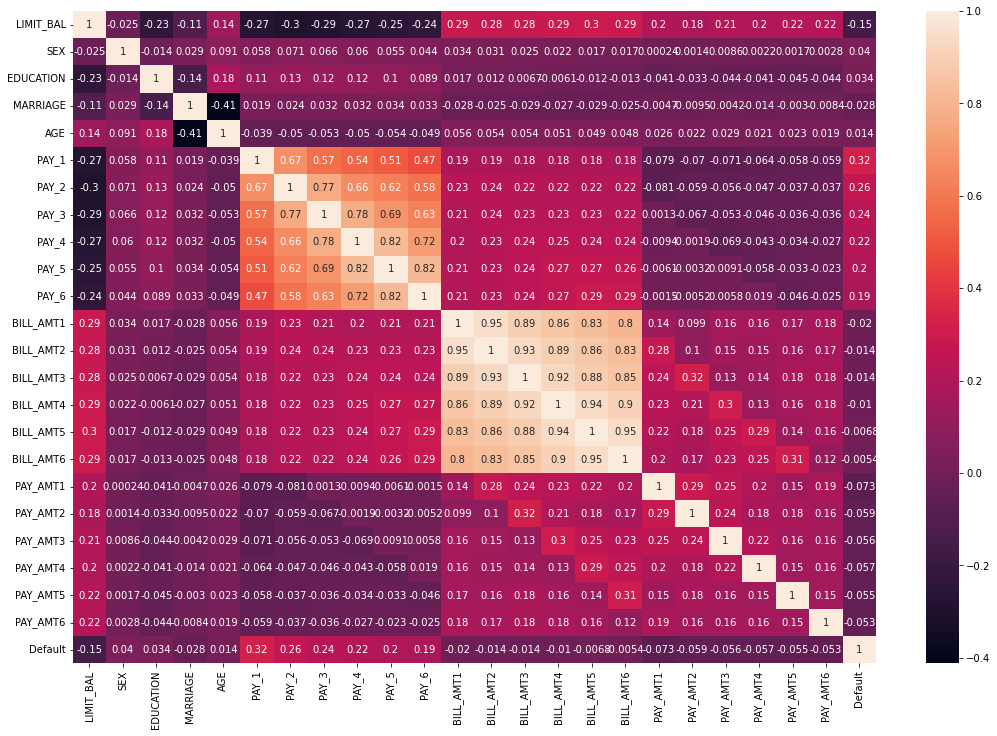

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

We can see from above

* PAY_1 is the most correlated feature to the target variable.

* BILL_AMT features are highly correlated with each other.

* Repayment Status(PAY) features are highly correlated with each other.





In [17]:
# For analysis:

df.SEX=df.SEX.map({1:'Male', 0:'Female'})
df.Default=df.Default.map({0:'No', 1:'Yes'})
df.EDUCATION=df.EDUCATION.map({1:'Graduate School',2:'University',3:'High School',4:'Others'})
df.MARRIAGE=df.MARRIAGE.map({1:'Married', 2:'Single',3:'Others'})

#### Target Variable

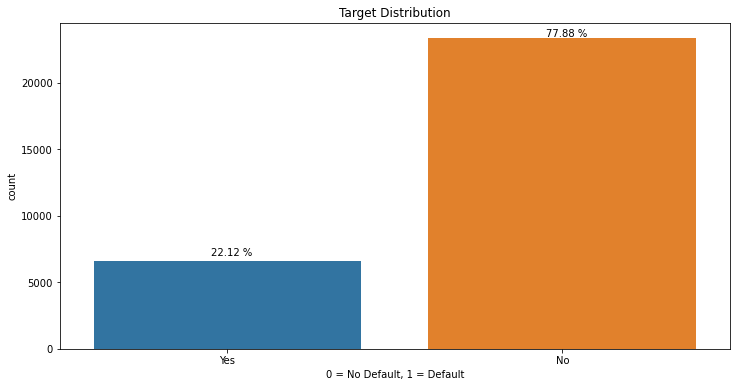

In [18]:
sns.countplot(df['Default'])
plt.text(x=-0.05,y=7000,s="22.12 %")
plt.text(x=0.95,y=23500,s="77.88 %")
plt.xlabel("0 = No Default, 1 = Default")
plt.title("Target Distribution")
#plt.savefig('Target_variable_Distribution.png')
plt.show()

#### Variable: SEX

In [19]:
df.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

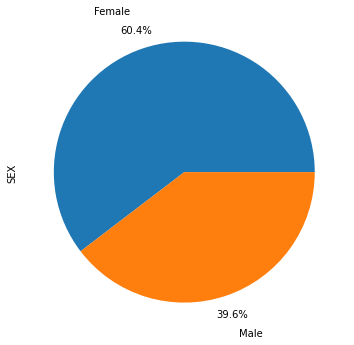

In [20]:
df['SEX'].value_counts().plot(kind='pie',autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.3)
plt.show()

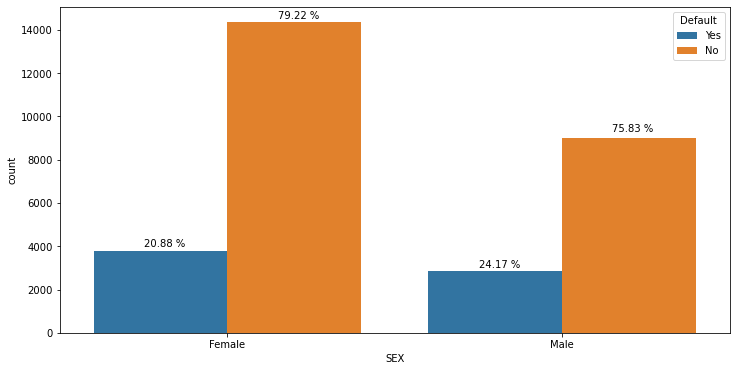

In [21]:
sns.countplot(x=df.SEX,hue=df.Default)
plt.text(x=-0.25,y=4000,s="20.88 %")
plt.text(x=0.15,y=14500,s="79.22 %")

plt.text(x=0.75,y=3000,s="24.17 %",)
plt.text(x=1.15,y=9300,s="75.83 %")


plt.xlabel("SEX")
plt.show()

There are more female then male in our dataset and men have slightly have more chance of default.
Around 24% of male customers and around 20.8% of female customers are default.

#### Variable: Marriage

In [22]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

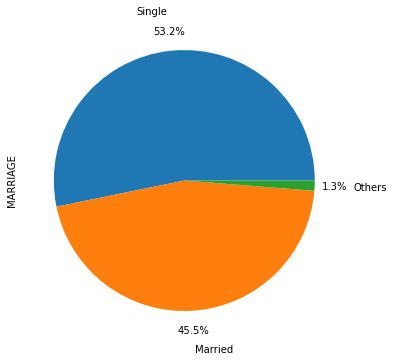

In [24]:
df['MARRIAGE'].value_counts().plot(kind='pie',autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.3)
plt.show()

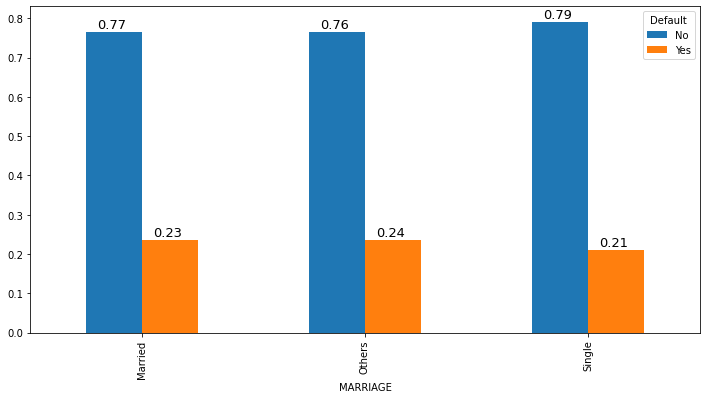

In [29]:
ax=pd.crosstab(df['MARRIAGE'],df['Default'],normalize='index').plot.bar()
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01),fontsize=13)

plt.show()

#### Variable : Education

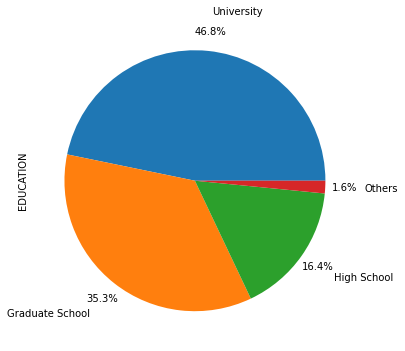

In [30]:
df['EDUCATION'].value_counts().plot(kind='pie',autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.3)
plt.show()

In [31]:
pd.crosstab(df['EDUCATION'],df['Default'],normalize='all')

Default,No,Yes
EDUCATION,,
Graduate School,0.284967,0.067867
High School,0.122667,0.041233
Others,0.014500,0.001100
University,0.356667,0.111000


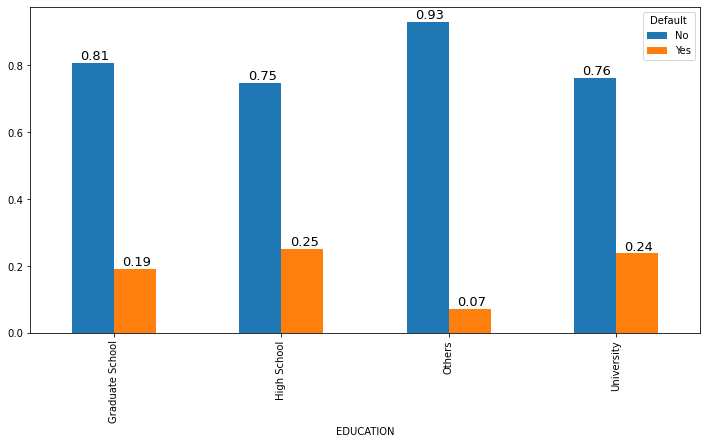

In [32]:
ax=pd.crosstab(df['EDUCATION'],df['Default'],normalize='index').plot.bar()
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01),fontsize=13)

plt.show()

#### Variable: Age

<AxesSubplot:xlabel='AGE', ylabel='Density'>

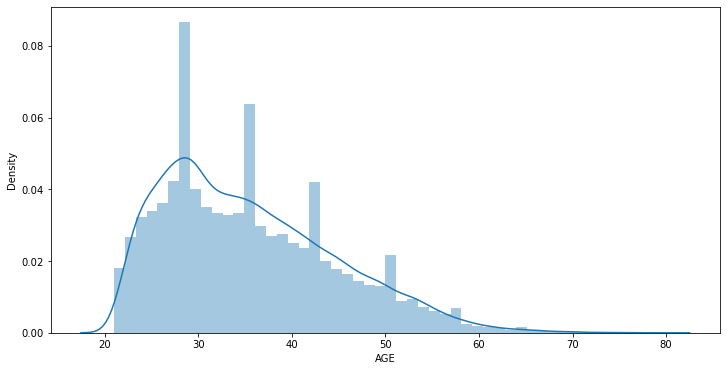

In [33]:
sns.distplot(df['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

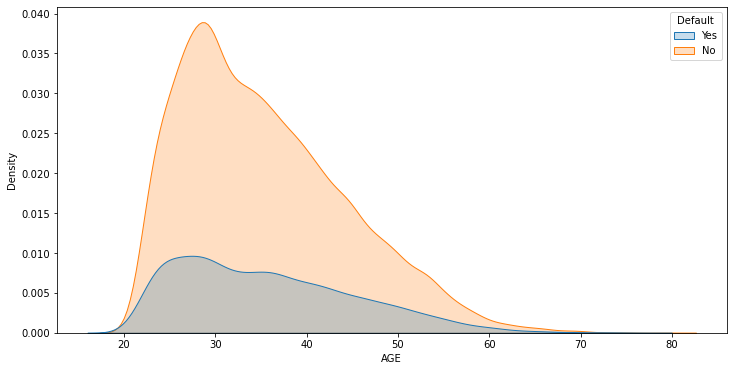

In [34]:
sns.kdeplot(x=df['AGE'],hue=df['Default'],shade=True)

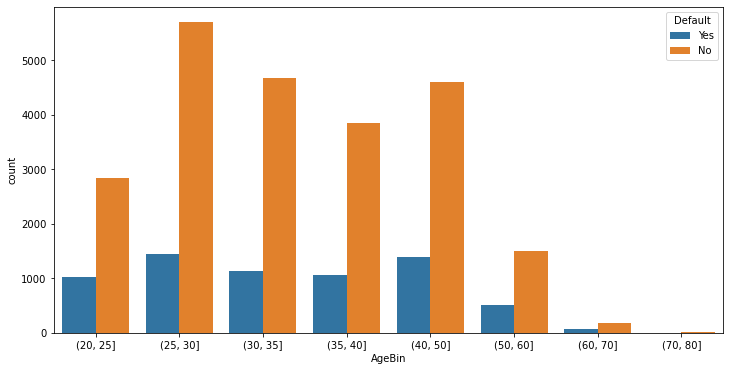

In [35]:
df['AgeBin']=pd.cut(df['AGE'],[20,25,30,35,40,50,60,70,80],ordered=True)
ax = sns.countplot(data = df, x = 'AgeBin', hue="Default")

In [36]:
df['AgeBin'].value_counts()

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 70]     257
(70, 80]      15
Name: AgeBin, dtype: int64

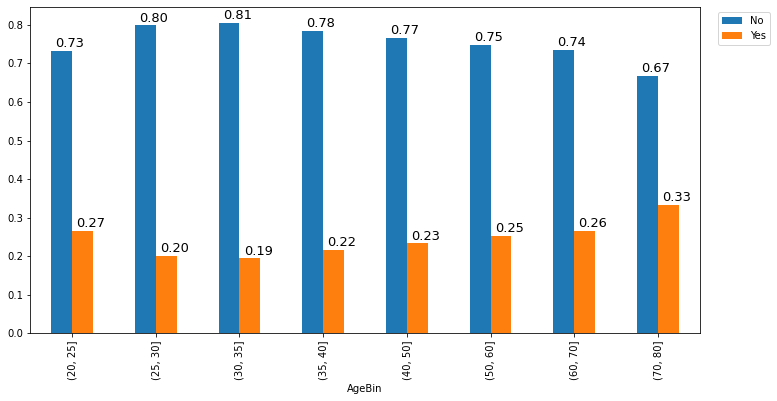

In [37]:
ax=pd.crosstab(df['AgeBin'],df['Default'],normalize='index').plot.bar()
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01),fontsize=13)
plt.legend(bbox_to_anchor =(1.02, 1),loc=2)
plt.show()

Middile age groups(25-40) have low chance of default.

#### Varaible: LIMIT_BAL

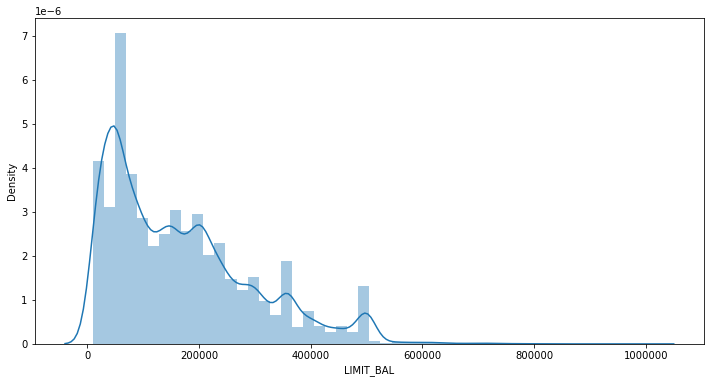

In [38]:
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')

Most of the customer have less than 200000  credit limit.

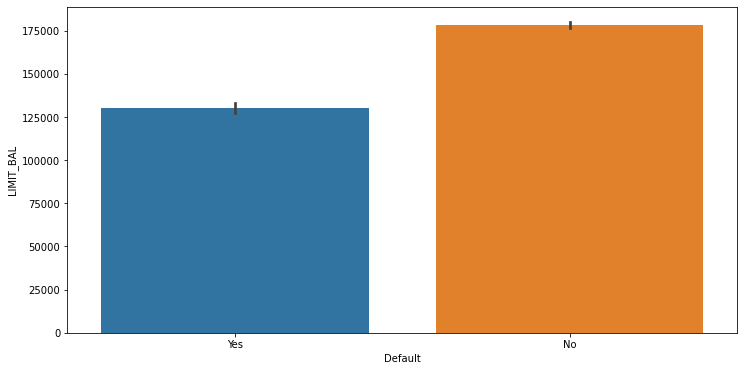

In [39]:
sns.barplot(x=df.Default, y=df.LIMIT_BAL)
plt.show()

The customer with low limit balance has more chance to be default than the higher limit balance.

We can do the binning of this feature and would be helpful in our prediction.

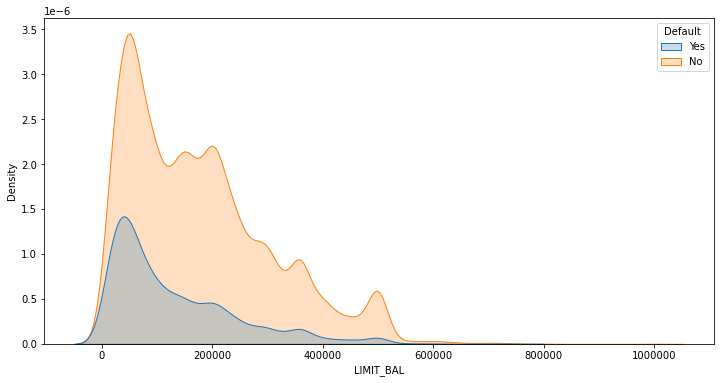

In [40]:
sns.kdeplot(x=df['LIMIT_BAL'],hue=df['Default'],shade=True)
plt.ticklabel_format(style='plain',axis='x')

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

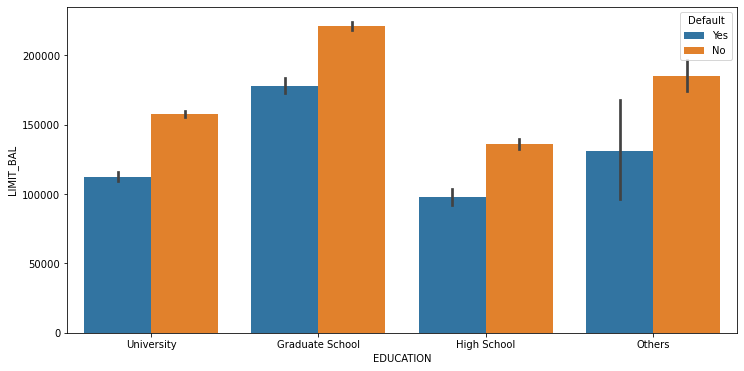

In [41]:
sns.barplot(x=df['EDUCATION'],y=df['LIMIT_BAL'],hue=df['Default'])

We can see that average credit limit for low education level is minimum.

### Repayment Features

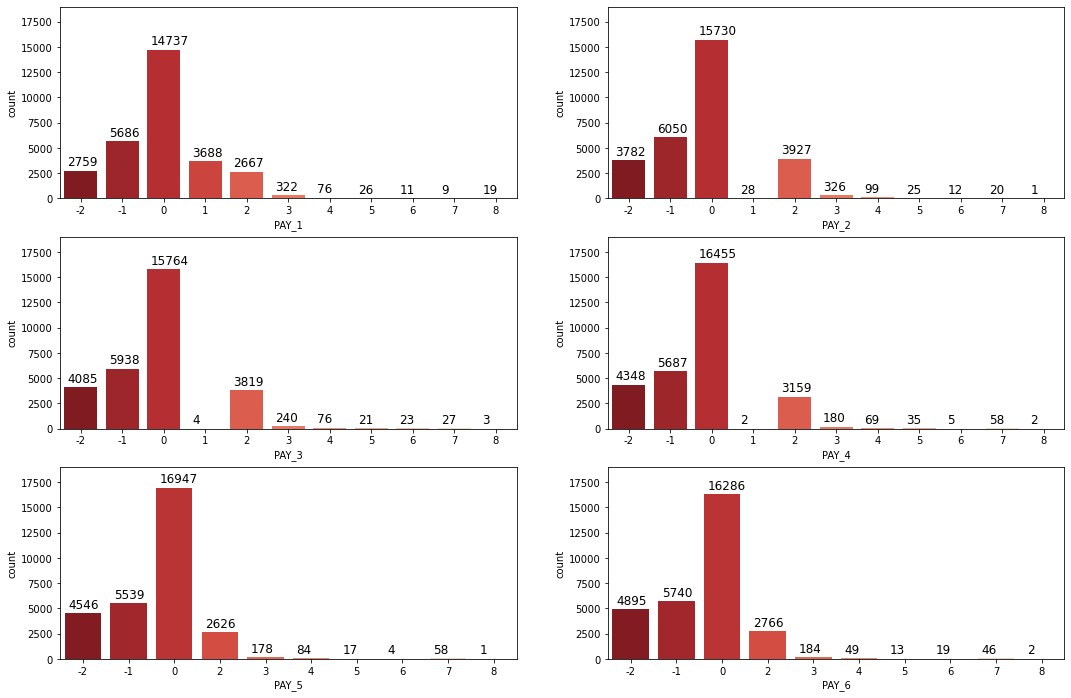

In [42]:
plt.figure(figsize=(18,12))

RePay=['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i,col in enumerate(RePay):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col],palette='Reds_r')
    plt.ylim([0,19000])
    for p in ax.patches:
            ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 12)

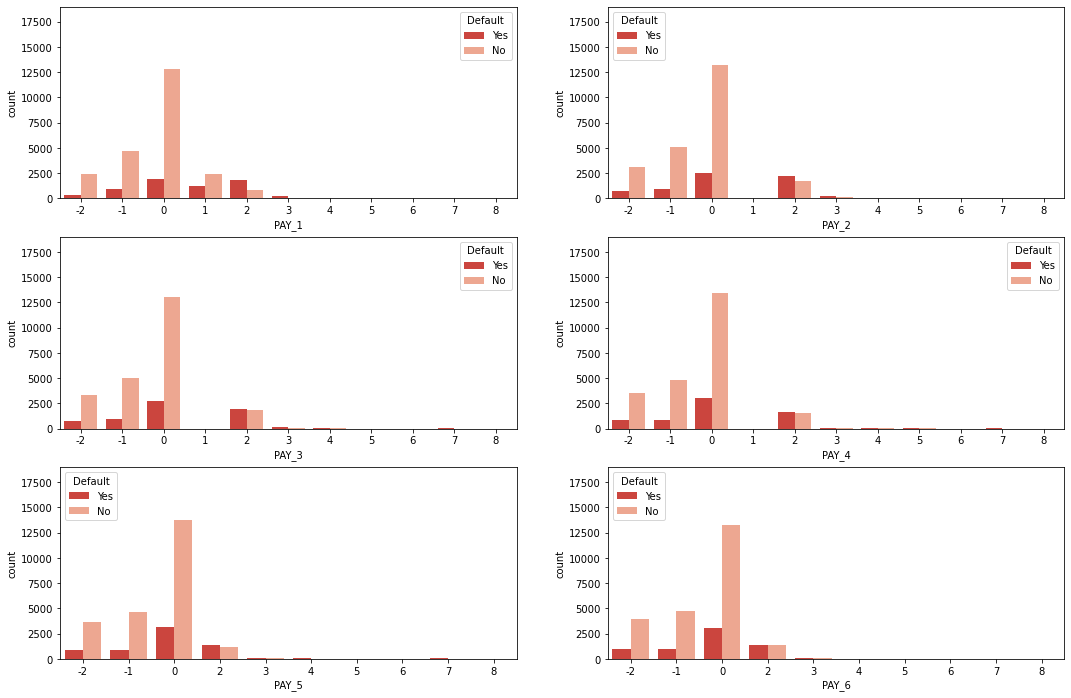

In [43]:
plt.figure(figsize=(18,12))


RePay=['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i,col in enumerate(RePay):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col],palette='Reds_r',hue=df['Default'])
    plt.ylim([0,19000])

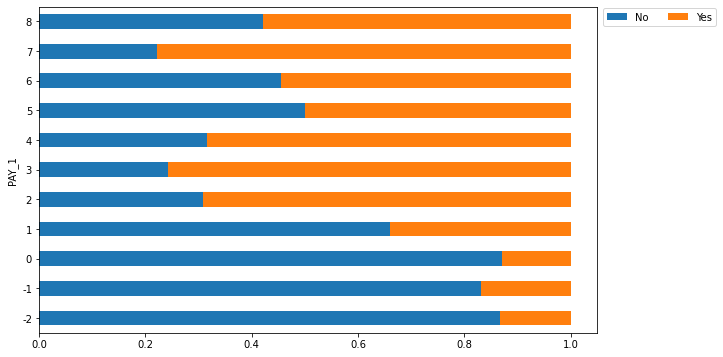

In [44]:
cross_tab = pd.crosstab(index=df['PAY_1'],columns=df['Default'],normalize='index')

cross_tab.plot(kind='barh',stacked=True,figsize=(10, 6))
plt.legend(loc=(1.01,0.94), ncol=2)
plt.show()

Most of the customers are paying the partial bill amount and duly paying.

And When payment is delayed more than 2 months, the chances of default goes higher than 50%.

## Feature Engineering

* Creating a new feature based on the their payments, this feature will tell us that for maximum how many months they delayed the payment or highest payment delay.

Example:

If a customer delayed the payment of 8 months this column will show 8.(Means this customer delayed the payment for 8 months)

In [45]:
df1=df.copy(deep=True)

In [46]:
df1['Higest_Delay']=df.iloc[:,[5,6,7,8,9,10]].max(axis=1)

<AxesSubplot:xlabel='Higest_Delay', ylabel='count'>

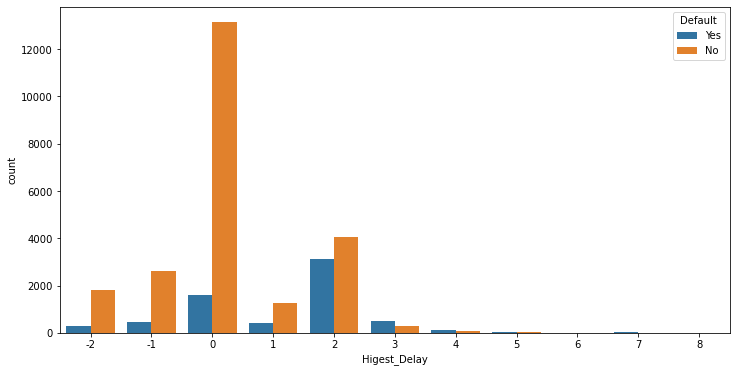

In [47]:
sns.countplot(data=df1,hue='Default',x='Higest_Delay')

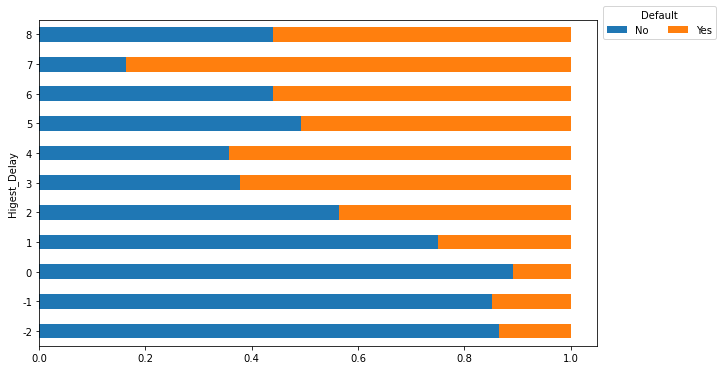

In [48]:
cross_tab = pd.crosstab(index=df1['Higest_Delay'],columns=df1['Default'],normalize='index')

cross_tab.plot(kind='barh',stacked=True,figsize=(10, 6))
l=plt.legend(loc=(1.01,0.94), ncol=2)
l.set_title("Default")
plt.show()

We can infer from above that most of the customer paying the bills paritailly and on time but the customer who delayed the payments for more than 1 month they are more likely to be defaulter.

#### Creating another feature which help us to getting the information, how many times the customer did not pay the full amount.

In [49]:
# Creating a new dataframe to get that feature.

# Considering the column which shows the payment status: (PAY_1 to PAY_6)
new=df.iloc[:,[5,6,7,8,9,10]]


new['a']=new['PAY_1'].map(lambda x:1 if x>=0 else 0)
new['b']=new['PAY_2'].map(lambda x:1 if x>=0 else 0)
new['c']=new['PAY_3'].map(lambda x:1 if x>=0 else 0)
new['d']=new['PAY_4'].map(lambda x:1 if x>=0 else 0)
new['e']=new['PAY_5'].map(lambda x:1 if x>=0 else 0)
new['f']=new['PAY_6'].map(lambda x:1 if x>=0 else 0)

new.head(2)

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,a,b,c,d,e,f
0,2,2,-1,-1,-2,-2,1,1,0,0,0,0
1,-1,2,0,0,0,2,0,1,1,1,1,1


In [50]:
df1.Default

0        Yes
1        Yes
2         No
3         No
4         No
        ... 
29995     No
29996     No
29997    Yes
29998    Yes
29999    Yes
Name: Default, Length: 30000, dtype: object

In [51]:
df1.Default=df.Default.map({'No':0, 'Yes':1})

In [52]:
# Tanking the sum of the columns along axis=1 of new columns(a,b,c,d,e,f)
new['Count_of_Delay']=new.iloc[:,[6,7,8,9,10,11]].sum(axis=1)

# After getting the final feture, add this to our main dataframe
df1['Count_of_Delay']=new['Count_of_Delay']

<AxesSubplot:xlabel='Count_of_Delay', ylabel='count'>

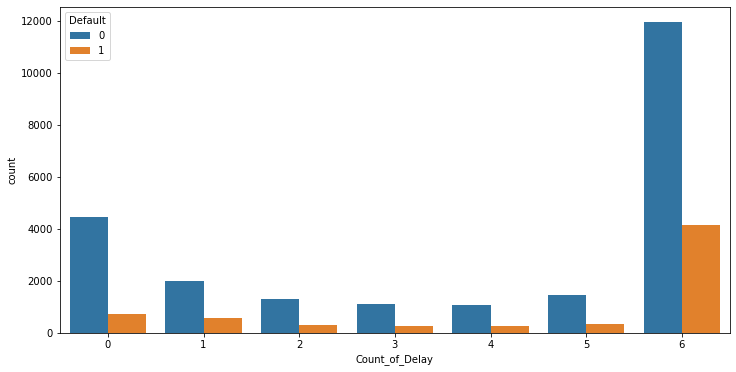

In [53]:
sns.countplot(data=df1,x='Count_of_Delay',hue='Default')

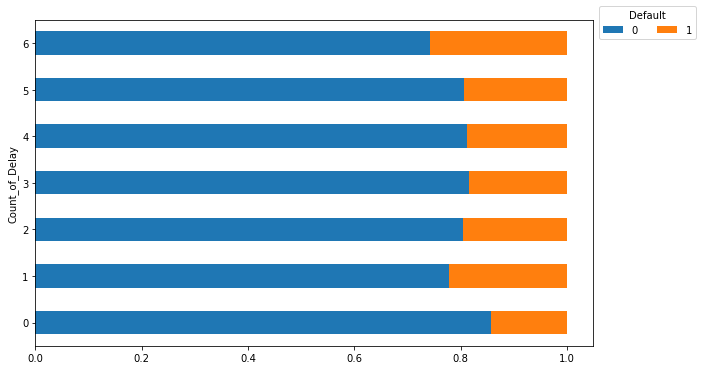

In [54]:
cross_tab = pd.crosstab(index=df1['Count_of_Delay'],columns=df1['Default'],normalize='index')

cross_tab.plot(kind='barh',stacked=True,figsize=(10, 6))
l=plt.legend(loc=(1.01,0.94), ncol=2)
l.set_title("Default")
plt.show()

We can see that our new fetures are positvely correlated with our target variable and highest_dealy is most correlated.

We will see that how important is these fetures in our models.

In [55]:
df1[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Higest_Delay','Count_of_Delay']].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Higest_Delay,Count_of_Delay
0,2,2,-1,-1,-2,-2,2,2
1,-1,2,0,0,0,2,2,5
2,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,6
4,-1,0,-1,0,0,0,0,4


#### Creating another feature, where we calculating the mean of their payments

In [56]:
amt =df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
df1['Payamt_mean'] =amt.sum(axis=1)/6

<AxesSubplot:xlabel='Default', ylabel='Payamt_mean'>

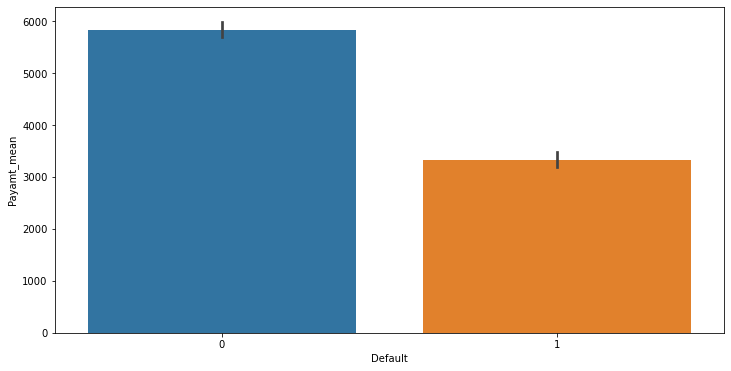

In [57]:
sns.barplot(data=df1,x='Default',y='Payamt_mean')

With this feature we can infer that the average payment paid by the default customer is less than the non default customer.

In [58]:
df1[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Payamt_mean']].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payamt_mean
0,0.0,689.0,0.0,0.0,0.0,0.0,114.833333
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0,833.333333
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1836.333333
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1398.000000
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0,9841.500000


In [59]:
bill =df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
billmean=bill.sum(axis=1)/6
df1['billmean']=billmean

In [60]:
df1['diff']=df1['billmean']-df1['Payamt_mean']

In [61]:
# df["billmeangreatamt"] = df["billmean"] >df["Payamt_mean"]

df1['bill_mean > Payment_mean']=df1['diff'].apply(lambda x: 1 if x>0 else 0)

In [62]:
pd.crosstab(df1['bill_mean > Payment_mean'], df1['Default'])

Default,0,1
bill_mean > Payment_mean,,
0,3675,929
1,19689,5707


<AxesSubplot:xlabel='bill_mean > Payment_mean'>

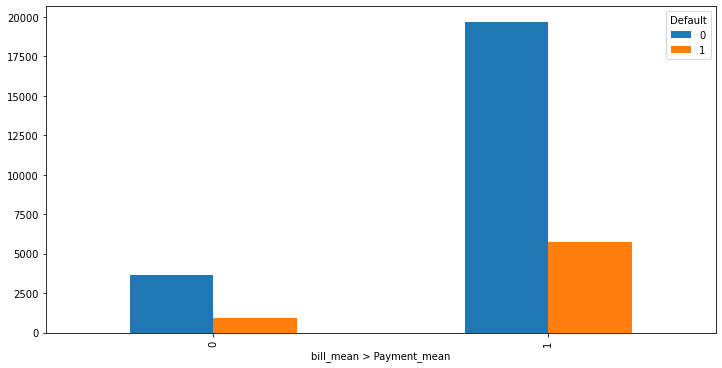

In [63]:
pd.crosstab(df1['bill_mean > Payment_mean'], df1['Default']).plot(kind='bar')

<AxesSubplot:xlabel='bill_mean > Payment_mean'>

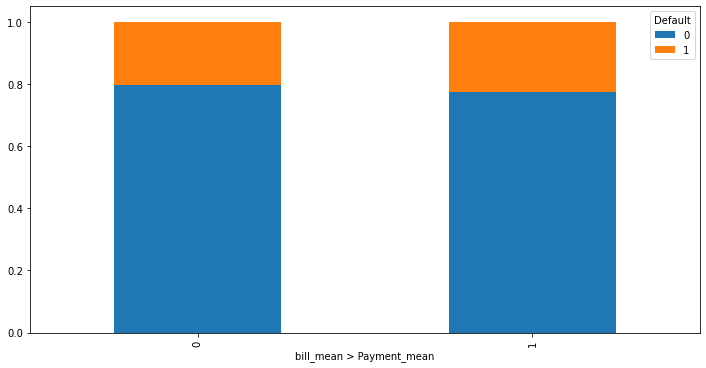

In [64]:
pd.crosstab(df1['bill_mean > Payment_mean'], df1['Default'],normalize='index').plot(kind='bar',stacked=True)

# Hypothesis

#### 1. Limit  provided to the customer : Customers having more credit limit are more defaulter or having less credit limit

<AxesSubplot:xlabel='Default', ylabel='LIMIT_BAL'>

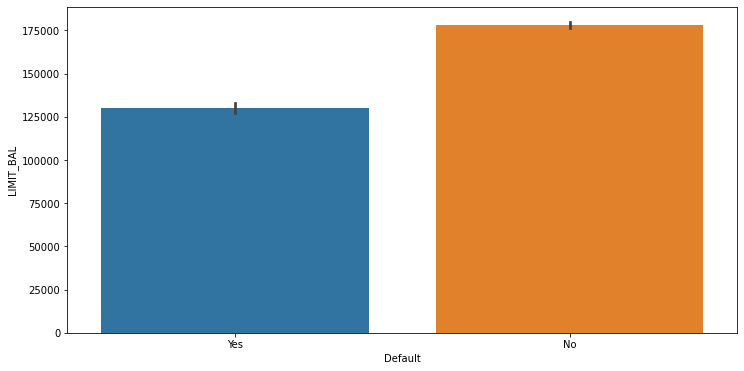

In [65]:
sns.barplot(data=df,x=df['Default'],y=df['LIMIT_BAL'])

In [66]:
stats.shapiro(df.LIMIT_BAL)

ShapiroResult(statistic=0.9073493480682373, pvalue=0.0)

In [67]:
## Hypothesis test to check whether average credit limit for dafaulters and non-defaulters are same

# H0 : The average credit limit of defaulters is equal to average credit limit of non-defaulter.
# H1 : The average credit limit of defaulters is not equal to average credit limit of non-defaulter.

from scipy import stats

stat, p_val = stats.ttest_ind(df.LIMIT_BAL.loc[df.Default=='Yes'], df.LIMIT_BAL.loc[df.Default=='No'])

print(f"P-Value:", round(p_val,4))

P-Value: 0.0


We reject the null hypotheseis as p-value is less than significamce level and conclude that customers with high credit limit are likelihood to be default than customers with less credit limit.

### 2. Defaulter are dependent on gender

In [68]:
pd.crosstab(df['Default'],df['SEX'])

SEX,Female,Male
Default,,
No,14349,9015
Yes,3763,2873


In [69]:
# H0 : Gender & Defaulter are Independent

# H1 : Gender & Defaulter are Dependent.

stats.chi2_contingency(pd.crosstab(df['Default'],df['SEX']))

(47.708796890621116,
 4.944678999412026e-12,
 1,
 array([[14105.6256,  9258.3744],
        [ 4006.3744,  2629.6256]]))

 Since p_value is less than significance level we reject the Null Hypothesis. 

 Concluding that there is dependancy among Gender & Defaulter.

### 3. Hypothesis test to check whether average age for dafaulters and non-defaulters are same.

In [70]:
# Null : Age & Default are Independent / mean of deafulter Age = mean of Non-defaulter age./ mu1 = mu2.

# Altr : Age & Default are Dependent /mean of deafulter Age != mean of Non-defaulter age / mu1 != mu2.

stats.ttest_ind(df[df['Default']=='No']['AGE'],df[df['Default']=='Yes']['AGE'])

Ttest_indResult(statistic=-2.40594177499625, pvalue=0.01613684589016383)

By assuming significance level 0.05, we reject the null hypothesis(average age of defaulter and non defaulter is not same) and can say Age is dependent on ther person will be defaulter or not.

<AxesSubplot:xlabel='Default', ylabel='AGE'>

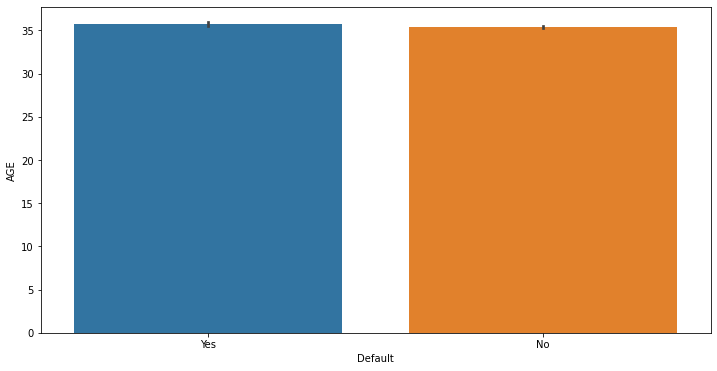

In [71]:
sns.barplot(y=df.AGE,x=df.Default)

<AxesSubplot:xlabel='Default', ylabel='AGE'>

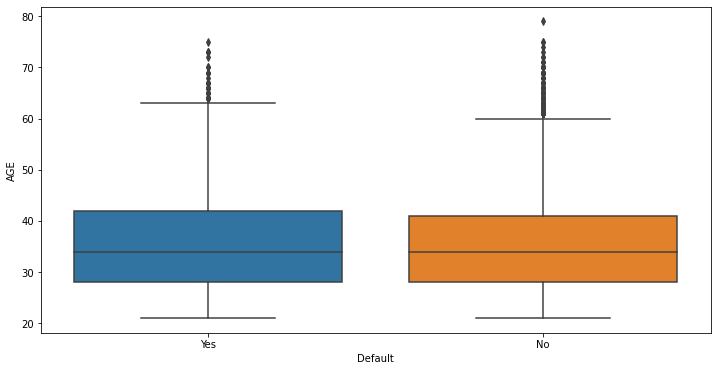

In [72]:
sns.boxplot(y=df.AGE,x=df.Default)

### Hypothesis to check whether the defaulter depend on education level.

In [73]:
# H0 : Default & Education are Independent

# H1 : Default & education are Dependent.

In [74]:
pd.crosstab(df['Default'],df['EDUCATION'])

EDUCATION,Graduate School,High School,Others,University
Default,,,,
No,8549,3680,435,10700
Yes,2036,1237,33,3330


In [75]:
stat,p_val,dof,exp=stats.chi2_contingency(pd.crosstab(df['Default'],df['EDUCATION']))
print("p-value:",round(p_val,4))

p-value: 0.0


As pvalue is less than the significant level so we reject the null hypothesis and can say defaulter is depend on educaton also.

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

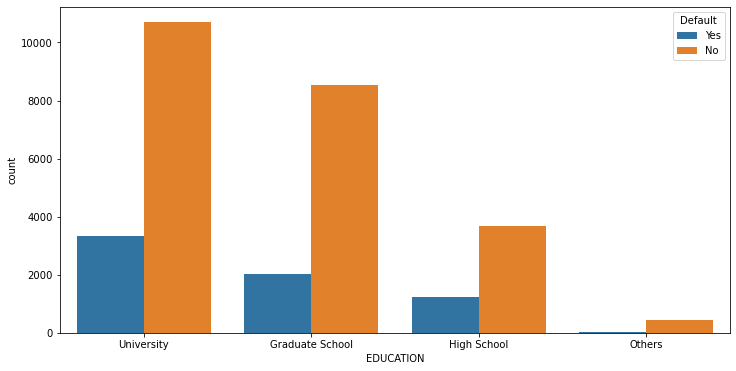

In [76]:
sns.countplot(data=df,x='EDUCATION',hue='Default')

# Data Preperation

In [77]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes,"(20, 25]"
1,120000.0,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes,"(25, 30]"
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No,"(30, 35]"
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No,"(35, 40]"
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No,"(50, 60]"


In [78]:
df.SEX=df.SEX.map({'Male':1,'Female':0})
df.Default=df.Default.map({'No':0, 'Yes':1})

df.EDUCATION=df.EDUCATION.map({'Graduate School':1,'University':2,'High School':3,'Others':4})

df.MARRIAGE=df.MARRIAGE.map({'Married':1, 'Single':2,'Others':3})

In [79]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin
0,20000.0,0,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]"
1,120000.0,0,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]"
2,90000.0,0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]"
3,50000.0,0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 60]"


In [80]:
df_num=df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_cat=df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [81]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin
0,20000.0,0,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]"
1,120000.0,0,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]"
2,90000.0,0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]"
3,50000.0,0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 60]"


In [82]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin,Higest_Delay,Count_of_Delay,Payamt_mean,billmean,diff,bill_mean > Payment_mean
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]",2,2,114.833333,1284.000000,1169.166667,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]",2,5,833.333333,2846.166667,2012.833333,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]",0,6,1836.333333,16942.166667,15105.833333,1
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]",0,6,1398.000000,38555.666667,37157.666667,1
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 60]",0,4,9841.500000,18223.166667,8381.666667,1


In [83]:
def train_accuracy(v):
    print("Train_Accuracy_Score:",accuracy_score(ytrain,v.predict(xtrain)))

def test_accuracy(w):
    print("Test_Accuracy_Score:",accuracy_score(ytest,w.predict(xtest)))

## With new features

In [84]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin,Higest_Delay,Count_of_Delay,Payamt_mean,billmean,diff,bill_mean > Payment_mean
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]",2,2,114.833333,1284.000000,1169.166667,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]",2,5,833.333333,2846.166667,2012.833333,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]",0,6,1836.333333,16942.166667,15105.833333,1
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]",0,6,1398.000000,38555.666667,37157.666667,1
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 60]",0,4,9841.500000,18223.166667,8381.666667,1


In [85]:
df1.SEX=df1.SEX.map({'Male':1,'Female':0})

df1.EDUCATION=df1.EDUCATION.map({'Graduate School':1,'University':2,'High School':3,'Others':4})

df1.MARRIAGE=df1.MARRIAGE.map({'Married':1, 'Single':2,'Others':3})

In [86]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin,Higest_Delay,Count_of_Delay,Payamt_mean,billmean,diff,bill_mean > Payment_mean
0,20000.0,0,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]",2,2,114.833333,1284.000000,1169.166667,1
1,120000.0,0,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]",2,5,833.333333,2846.166667,2012.833333,1
2,90000.0,0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]",0,6,1836.333333,16942.166667,15105.833333,1
3,50000.0,0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]",0,6,1398.000000,38555.666667,37157.666667,1
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 60]",0,4,9841.500000,18223.166667,8381.666667,1


In [87]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop('Default',axis=1)
df_numeric_features_vif.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Higest_Delay,Count_of_Delay,Payamt_mean,billmean,diff,bill_mean > Payment_mean
0,20000.0,0,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,2,2,114.833333,1284.000000,1169.166667,1
1,120000.0,0,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2,5,833.333333,2846.166667,2012.833333,1
2,90000.0,0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,6,1836.333333,16942.166667,15105.833333,1
3,50000.0,0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,6,1398.000000,38555.666667,37157.666667,1
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,4,9841.500000,18223.166667,8381.666667,1


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,BILL_AMT4
1,inf,PAY_AMT4
2,inf,BILL_AMT5
3,inf,PAY_AMT2
4,inf,BILL_AMT3
5,inf,BILL_AMT2
6,inf,BILL_AMT1
7,inf,PAY_AMT3
8,inf,PAY_AMT5
9,inf,PAY_AMT1


In [89]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,PAY_AMT1
1,inf,diff
2,inf,billmean
3,inf,Payamt_mean
4,inf,PAY_AMT6
5,inf,PAY_AMT5
6,inf,PAY_AMT4
7,inf,PAY_AMT3
8,inf,PAY_AMT2
9,94.674662,BILL_AMT3


In [90]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,diff
1,inf,billmean
2,inf,Payamt_mean
3,94.674662,BILL_AMT3
4,91.615638,BILL_AMT5
5,74.515811,BILL_AMT2
6,62.177428,BILL_AMT1
7,46.963419,BILL_AMT6
8,13.442541,Count_of_Delay
9,12.420987,AGE


In [91]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1066.872678,billmean
1,94.674662,BILL_AMT3
2,91.615638,BILL_AMT5
3,74.515811,BILL_AMT2
4,62.177428,BILL_AMT1
5,46.963419,BILL_AMT6
6,29.467177,Payamt_mean
7,13.442541,Count_of_Delay
8,12.420987,AGE
9,10.708620,bill_mean > Payment_mean


In [92]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff','billmean'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,38.453571,BILL_AMT2
1,29.448372,Payamt_mean
2,27.750387,BILL_AMT5
3,25.985533,BILL_AMT3
4,21.455580,BILL_AMT6
5,21.192059,BILL_AMT1
6,13.436471,Count_of_Delay
7,12.420771,AGE
8,10.707648,bill_mean > Payment_mean
9,7.525003,EDUCATION


In [93]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff','billmean','BILL_AMT2'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,27.739793,BILL_AMT5
1,21.513951,Payamt_mean
2,21.392703,BILL_AMT6
3,18.578167,BILL_AMT3
4,13.397164,Count_of_Delay
5,12.420040,AGE
6,10.648641,bill_mean > Payment_mean
7,10.240546,BILL_AMT1
8,7.524902,EDUCATION
9,7.392764,MARRIAGE


In [94]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,21.513382,Payamt_mean
1,16.214200,BILL_AMT3
2,13.397133,Count_of_Delay
3,12.419836,AGE
4,10.640853,bill_mean > Payment_mean
5,10.239832,BILL_AMT1
6,7.605988,BILL_AMT6
7,7.521954,EDUCATION
8,7.391417,MARRIAGE
9,5.027068,PAY_5


In [95]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,15.616383,BILL_AMT3
1,13.393831,Count_of_Delay
2,12.419741,AGE
3,10.614015,bill_mean > Payment_mean
4,9.992992,BILL_AMT1
5,7.581351,BILL_AMT6
6,7.521677,EDUCATION
7,7.391369,MARRIAGE
8,5.027055,PAY_5
9,4.524005,PAY_4


In [96]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,13.310162,Count_of_Delay
1,12.419459,AGE
2,10.587681,bill_mean > Payment_mean
3,7.521204,EDUCATION
4,7.389590,MARRIAGE
5,5.175251,BILL_AMT6
6,5.027004,PAY_5
7,4.978625,BILL_AMT1
8,4.520344,PAY_4
9,4.342490,Higest_Delay


In [97]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','PAY_AMT1','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,11.900337,AGE
1,8.359274,bill_mean > Payment_mean
2,7.303460,EDUCATION
3,6.647430,MARRIAGE
4,5.109732,BILL_AMT6
5,4.978549,PAY_5
6,4.862320,BILL_AMT1
7,4.480842,PAY_4
8,4.163761,Higest_Delay
9,3.980365,LIMIT_BAL


In [98]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,11.900379,AGE
1,8.375983,bill_mean > Payment_mean
2,7.303884,EDUCATION
3,6.647433,MARRIAGE
4,5.130396,BILL_AMT6
5,4.978554,PAY_5
6,4.865648,BILL_AMT1
7,4.480929,PAY_4
8,4.164851,Higest_Delay
9,3.992173,LIMIT_BAL


In [99]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay','AGE'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,7.528241,bill_mean > Payment_mean
1,6.597798,MARRIAGE
2,5.307314,EDUCATION
3,5.123471,BILL_AMT6
4,4.970151,PAY_5
5,4.857921,BILL_AMT1
6,4.475951,PAY_4
7,4.059106,Higest_Delay
8,3.872879,PAY_3
9,3.566760,PAY_6


In [100]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay','AGE','bill_mean > Payment_mean'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,5.120347,BILL_AMT6
1,5.045051,MARRIAGE
2,4.963912,PAY_5
3,4.745221,BILL_AMT1
4,4.464985,PAY_4
5,4.281980,EDUCATION
6,4.059045,Higest_Delay
7,3.868543,PAY_3
8,3.561431,PAY_6
9,3.469318,LIMIT_BAL


In [101]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay','AGE','bill_mean > Payment_mean','BILL_AMT6'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,5.041445,MARRIAGE
1,4.959933,PAY_5
2,4.464034,PAY_4
3,4.281978,EDUCATION
4,4.057520,Higest_Delay
5,3.868037,PAY_3
6,3.497493,PAY_6
7,3.417264,LIMIT_BAL
8,3.224018,PAY_2
9,2.817656,PAY_1


In [102]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay','bill_mean > Payment_mean','BILL_AMT6','MARRIAGE','EDUCATION'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,4.963127,PAY_5
1,4.463350,PAY_4
2,4.168637,AGE
3,4.018844,Higest_Delay
4,3.870881,PAY_3
5,3.811020,LIMIT_BAL
6,3.490684,PAY_6
7,3.223090,PAY_2
8,2.811805,PAY_1
9,2.080377,BILL_AMT1


In [103]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay','bill_mean > Payment_mean','BILL_AMT6','MARRIAGE','EDUCATION','PAY_5'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,4.161129,AGE
1,4.016277,Higest_Delay
2,3.870466,PAY_3
3,3.810352,LIMIT_BAL
4,3.479009,PAY_4
5,3.211815,PAY_2
6,2.811749,PAY_1
7,2.459502,PAY_6
8,2.079540,BILL_AMT1
9,1.662059,SEX


In [104]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number]).drop(['Default','BILL_AMT4','diff','billmean',
                                                                       'BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
                                                                       'Count_of_Delay','bill_mean > Payment_mean','BILL_AMT6','MARRIAGE',
                                                                       'EDUCATION','PAY_5','PAY_3','AGE'],axis=1)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.216943,Higest_Delay
1,2.930914,LIMIT_BAL
2,2.843044,PAY_4
3,2.722980,PAY_1
4,2.625009,PAY_2
5,2.391259,PAY_6
6,1.985859,BILL_AMT1
7,1.422138,SEX
8,1.324940,PAY_AMT1
9,1.281530,PAY_AMT3


In [105]:
x=df1.drop(['Default','AgeBin','BILL_AMT4','diff','billmean','BILL_AMT2','BILL_AMT5','Payamt_mean','BILL_AMT3',
            'Count_of_Delay','EDUCATION','bill_mean > Payment_mean','BILL_AMT6','MARRIAGE','PAY_5',"PAY_3",'AGE'],axis=1)
y=df1['Default']

In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=25)

In [107]:
def train_accuracy(v):
    return(accuracy_score(ytrain,v.predict(xtrain)))

def test_accuracy(w):
    return(accuracy_score(ytest,w.predict(xtest)))
    
def roc_cur(a):
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
def roc_score(b):
    return(roc_auc_score(ytest,b.predict(xtest)))

def class_report(c):
    print("Classification_report:", classification_report((ytest,c.predict(xtest))))

def sen(d):
    h=confusion_matrix(ytest,d.predict(xtest))
    sensitivity=h[1][1]/((h[1][1]+h[1][0]))
    return sensitivity
def spe(e):
    g=confusion_matrix(ytest,e.predict(xtest))
    sensitivity=g[0][0]/((g[0][0]+g[0][1]))
    return sensitivity

def f_score(f):
    return(f1_score(ytest,f.predict(xtest)))

def f1_w(i):
    labels=[0,1]
    f=f1_score(ytest,i.predict(xtest),average=None,labels=labels)
    return(round(((f[0]*ytest.value_counts()[0])+(f[1]*ytest.value_counts()[1]))/(ytest.value_counts()[0]+ytest.value_counts()[1]),4))



In [108]:
def scores(a):
    print("Train_Accuracy_Score:",round(accuracy_score(ytrain,a.predict(xtrain)),3))
    print("Test_Accuracy_Score:",round(accuracy_score(ytest,a.predict(xtest)),3))
    print('\n')
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    
    print("roc_auc_score:",round(roc_auc_score(ytest,a.predict(xtest)),3))
    print('\n')
    print("Classification_report:\n", classification_report(ytest,a.predict(xtest)))
    
    
    plot_confusion_matrix(a,xtest,ytest)

In [109]:
def scores_scaled(a):
    print("Train_Accuracy_Score:",round(accuracy_score(ytrain,a.predict(xtrain_scaled)),3))
    print("Test_Accuracy_Score:",round(accuracy_score(ytest,a.predict(xtest_scaled)),3))
    print('\n')
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest_scaled)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    
    print("roc_auc_score:",round(roc_auc_score(ytest,a.predict(xtest_scaled)),3))
    print('\n')
    print("Classification_report:\n", classification_report(ytest,a.predict(xtest_scaled)))
    
    plot_confusion_matrix(a,xtest_scaled,ytest)

In [110]:
score_card = pd.DataFrame(columns=['Model_Name', 'Train_Accuracy', 'Test_Accuracy',
                                       'ROC_Score','Specificity','Sensitivity','f1_weighted_avg'])

def update_score_card(algorithm_name, model):
    
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name, 'Train_Accuracy': train_accuracy(model),
                                    'Test_Accuracy': test_accuracy(model), 'ROC_Score': roc_score(model),
                                    'Specificity':spe(model),'Sensitivity':sen(model),
                                    'f1_weighted_avg':f1_w(model)}, ignore_index = True)

# Base Models

### Logistic model

Train_Accuracy_Score: 0.78
Test_Accuracy_Score: 0.776


roc_auc_score: 0.5


Classification_report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      6986
           1       0.00      0.00      0.00      2014

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



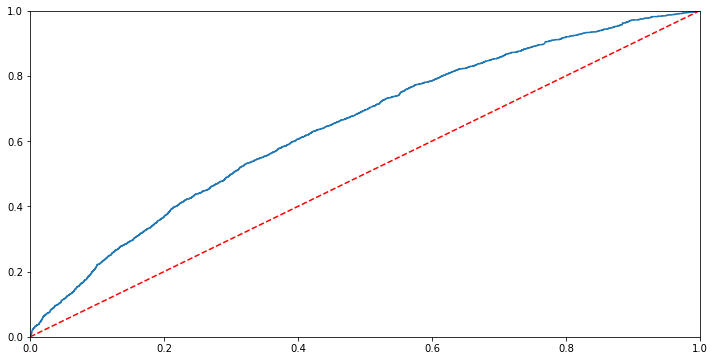

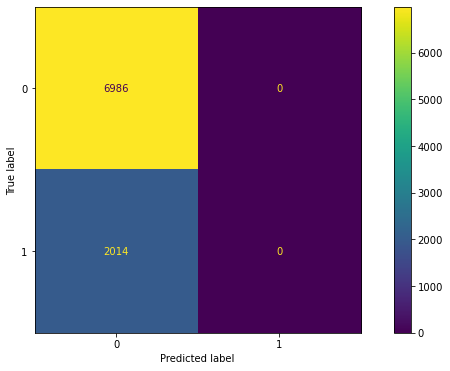

In [111]:
lr=LogisticRegression(random_state=25)
lr_model=lr.fit(xtrain,ytrain)

scores(lr_model)

In [112]:
update_score_card('Logistic Regression', lr_model)

### Decision Tree

Train_Accuracy_Score: 0.992
Test_Accuracy_Score: 0.728


roc_auc_score: 0.615


Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      6986
           1       0.40      0.41      0.40      2014

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



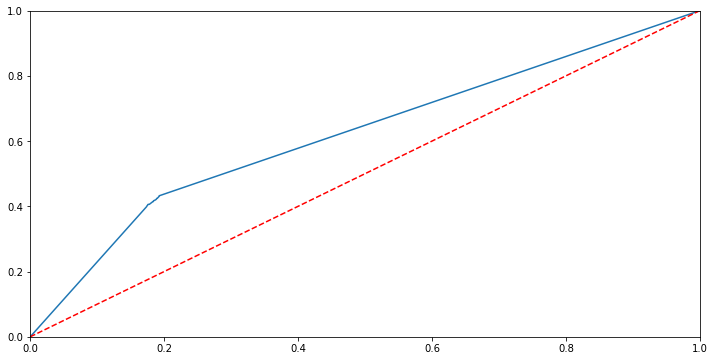

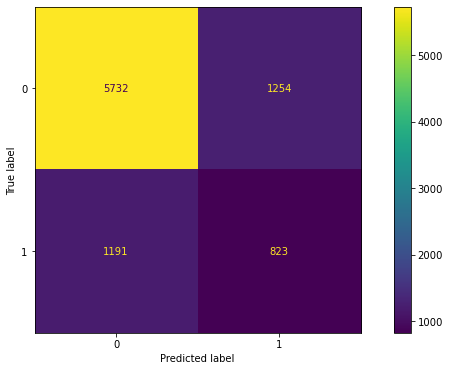

In [113]:
dt=DecisionTreeClassifier(random_state=25)
dt_model=dt.fit(xtrain,ytrain)

scores(dt_model)

In [114]:
important_features=pd.DataFrame(dt_model.feature_importances_)
important_features['Features']=xtrain.columns
important_features.sort_values(by=0,ascending=False)
important_features=important_features.sort_values(by=0,ascending=False)
important_features

,0,Features
2,0.163971,PAY_1
6,0.137416,BILL_AMT1
7,0.097204,PAY_AMT1
8,0.090013,PAY_AMT2
9,0.082789,PAY_AMT3
12,0.082649,PAY_AMT6
11,0.081738,PAY_AMT5
0,0.080676,LIMIT_BAL
10,0.075842,PAY_AMT4
13,0.044868,Higest_Delay


<AxesSubplot:xlabel='0', ylabel='Features'>

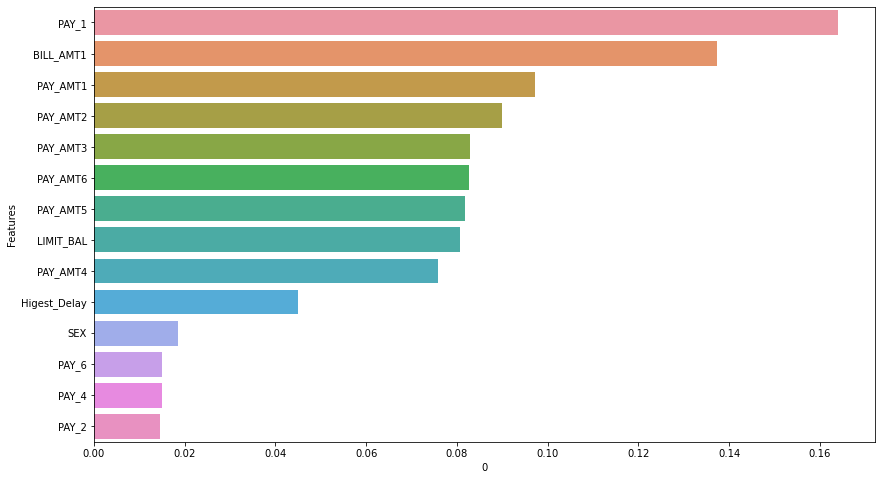

In [115]:
plt.figure(figsize=(14,8))
sns.barplot(data=important_features,x=0,y='Features')

In [116]:
update_score_card('Decision Tree', dt_model)

### Naive Bayes

In [117]:
mm=MinMaxScaler()
xtrain_scaled=pd.DataFrame(mm.fit_transform(xtrain),columns=xtrain.columns)
xtest_scaled=mm.transform(xtest)

Train_Accuracy_Score: 0.734
Test_Accuracy_Score: 0.736


roc_auc_score: 0.705


Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      6986
           1       0.44      0.65      0.52      2014

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.75      9000



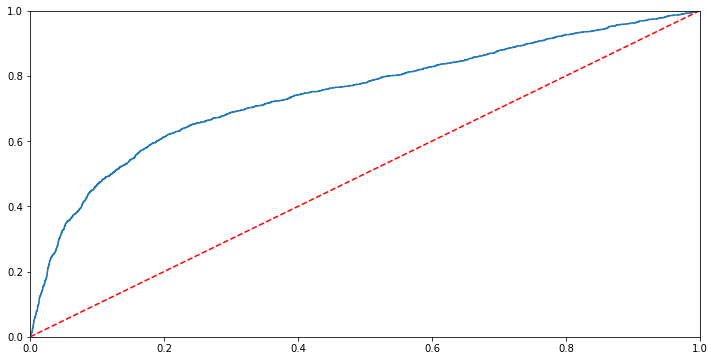

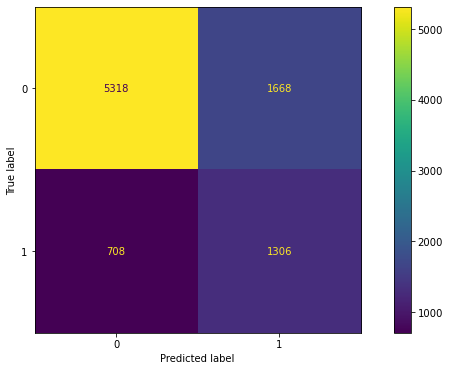

In [118]:
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain_scaled,ytrain)

scores_scaled(gnb_model)

In [119]:
update_score_card('Gaussian Naive Bayes',gnb_model)

### K-Neighbor

Train_Accuracy_Score: 0.844
Test_Accuracy_Score: 0.797


roc_auc_score: 0.645


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      6986
           1       0.57      0.37      0.45      2014

    accuracy                           0.80      9000
   macro avg       0.70      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000



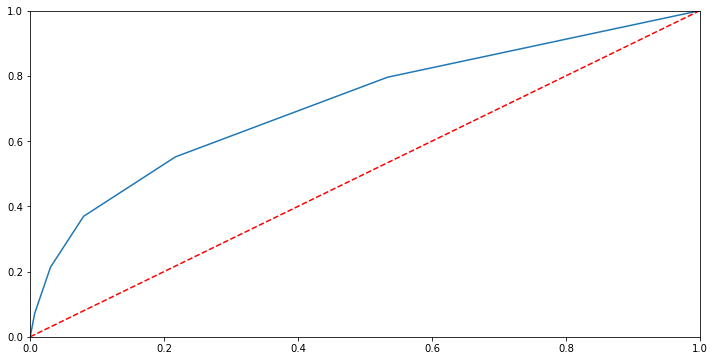

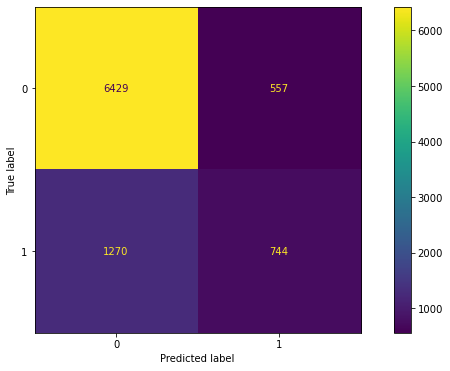

In [120]:
kn=KNeighborsClassifier()
kn_model=kn.fit(xtrain_scaled,ytrain)

scores_scaled(kn_model)

In [121]:
update_score_card('KNN',kn_model)

In [122]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.000000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.408640,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.500602,0.999714,0.001490,0.6791
3,KNN,0.780000,0.776222,0.500353,0.999714,0.000993,0.6788


In [123]:
score_card.iloc[2,3]=0.705
score_card.iloc[2,4]=0.76
score_card.iloc[2,5]=0.65
score_card.iloc[2,6]=0.75


score_card.iloc[3,3]=0.645
score_card.iloc[3,4]=0.92
score_card.iloc[3,5]=0.37
score_card.iloc[3,6]=0.78

score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.00000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.40864,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.705000,0.760000,0.65000,0.7500
3,KNN,0.780000,0.776222,0.645000,0.920000,0.37000,0.7800


#### Tuning of decision tree

In [124]:
criterion=['gini','entropy']
max_features=['sqrt','log2',0.75,1]
min_samples_split=[5,10,20,30,50]
max_depth=[5,8,13]
min_samples_leaf=[5,10,15,30,40,50,60]

Train_Accuracy_Score: 0.824
Test_Accuracy_Score: 0.815


roc_auc_score: 0.647


Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6986
           1       0.67      0.34      0.45      2014

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



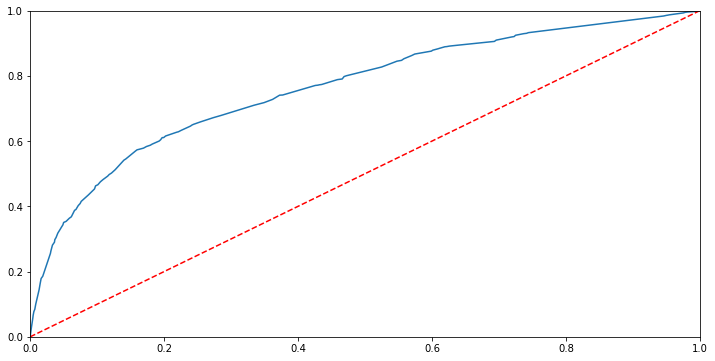

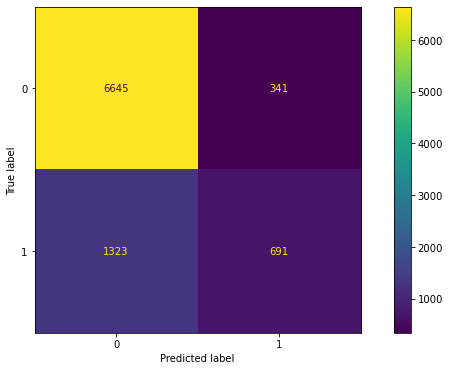

In [125]:
dt=DecisionTreeClassifier(random_state=25,criterion='entropy',max_depth=8,max_features=0.75,min_samples_leaf=50,min_samples_split=5)
dt_model=dt.fit(xtrain,ytrain)

scores(dt_model)

In [126]:
update_score_card('Decision Tree with tuning',dt_model)

In [127]:
important_features=pd.DataFrame(dt_model.feature_importances_)
important_features['Features']=xtrain.columns
important_features.sort_values(by=0,ascending=False)
important_features=important_features.sort_values(by=0,ascending=False)
important_features

,0,Features
2,0.560473,PAY_1
13,0.188646,Higest_Delay
6,0.060726,BILL_AMT1
8,0.045852,PAY_AMT2
0,0.038633,LIMIT_BAL
7,0.027069,PAY_AMT1
9,0.016691,PAY_AMT3
10,0.012400,PAY_AMT4
11,0.011769,PAY_AMT5
5,0.011710,PAY_6


<AxesSubplot:xlabel='0', ylabel='Features'>

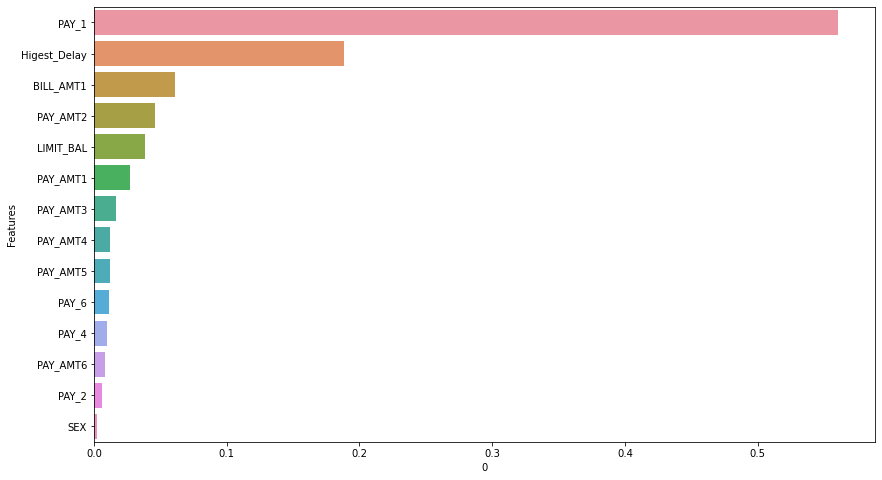

In [128]:
plt.figure(figsize=(14,8))
sns.barplot(data=important_features,x=0,y='Features')

In [129]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.000000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.408640,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.705000,0.760000,0.650000,0.7500
3,KNN,0.780000,0.776222,0.645000,0.920000,0.370000,0.7800
4,Decision Tree with tuning,0.824476,0.815111,0.647143,0.951188,0.343098,0.7914


### Tuning of KNN

Train_Accuracy_Score: 0.826
Test_Accuracy_Score: 0.811


roc_auc_score: 0.654


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6986
           1       0.63      0.37      0.47      2014

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.79      0.81      0.79      9000



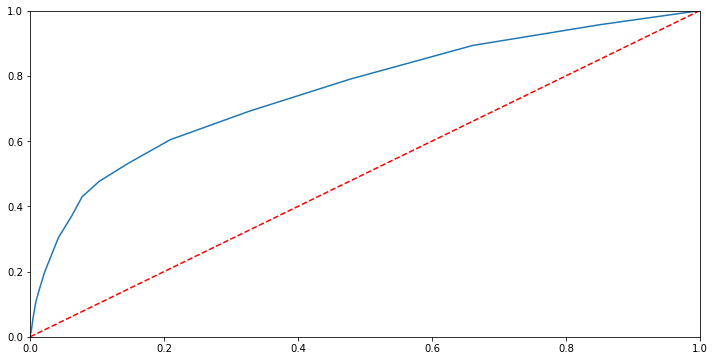

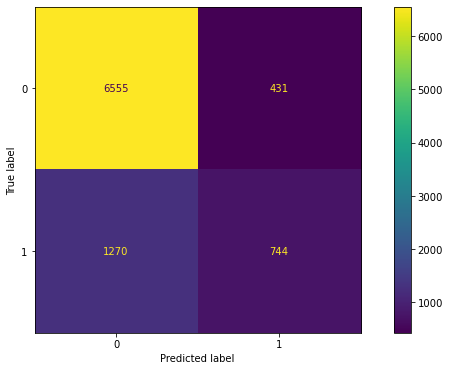

In [130]:
kn=KNeighborsClassifier(n_neighbors=17,p=1) #p=1(Manhattan)
kn_model=kn.fit(xtrain_scaled,ytrain)

scores_scaled(kn_model)

In [131]:
update_score_card('KNN with tuning',kn_model)

In [132]:
score_card.iloc[5,4]=0.94
score_card.iloc[5,5]=0.37
score_card.iloc[5,6]=0.79

In [133]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.000000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.408640,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.705000,0.760000,0.650000,0.7500
3,KNN,0.780000,0.776222,0.645000,0.920000,0.370000,0.7800
4,Decision Tree with tuning,0.824476,0.815111,0.647143,0.951188,0.343098,0.7914
5,KNN with tuning,0.797714,0.798778,0.649344,0.940000,0.370000,0.7900


#### Tuning of GNB

In [134]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1,scoring='f1')
nbModel_grid.fit(xtrain_scaled,ytrain)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0008111308307896872)


Train_Accuracy_Score: 0.772
Test_Accuracy_Score: 0.773


roc_auc_score: 0.704


Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6986
           1       0.49      0.58      0.53      2014

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.77      0.78      9000



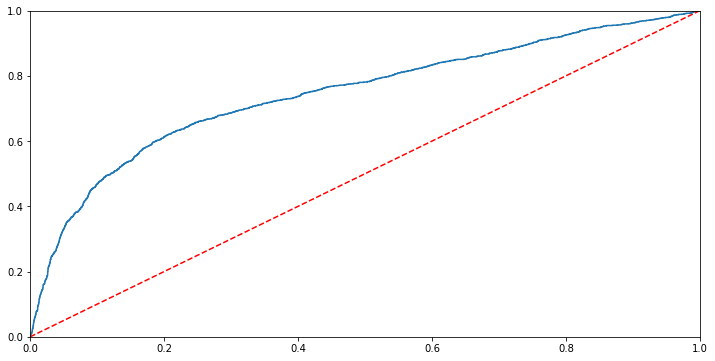

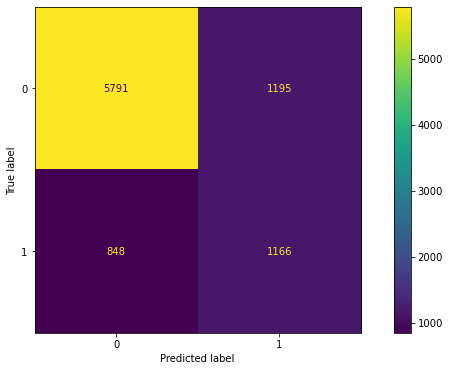

In [135]:
gnb=GaussianNB(var_smoothing=0.0008111308307896872)
gnb_model=gnb.fit(xtrain_scaled,ytrain)

scores_scaled(gnb_model)

In [136]:
update_score_card('Gaussian Naive Bayes with Tuning',gnb_model)

In [137]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.000000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.408640,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.705000,0.760000,0.650000,0.7500
3,KNN,0.780000,0.776222,0.645000,0.920000,0.370000,0.7800
4,Decision Tree with tuning,0.824476,0.815111,0.647143,0.951188,0.343098,0.7914
5,KNN with tuning,0.797714,0.798778,0.649344,0.940000,0.370000,0.7900
6,Gaussian Naive Bayes with Tuning,0.778952,0.775667,0.500349,0.998712,0.001986,0.6790


In [138]:
score_card.iloc[6,3]=0.704
score_card.iloc[6,4]=0.830
score_card.iloc[6,5]=0.580
score_card.iloc[6,6]=0.780

## Ensemble Techniques

Train_Accuracy_Score: 0.992
Test_Accuracy_Score: 0.81


roc_auc_score: 0.651


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      6986
           1       0.63      0.36      0.46      2014

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



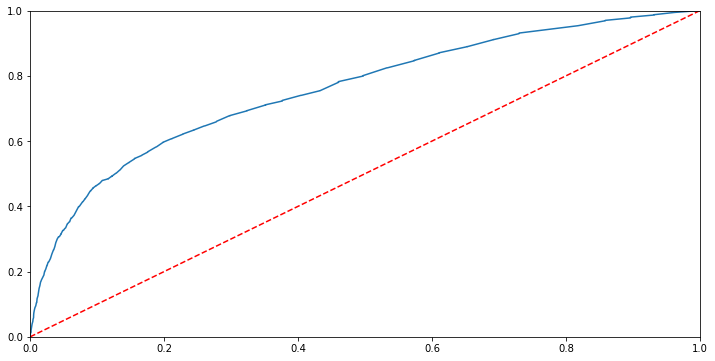

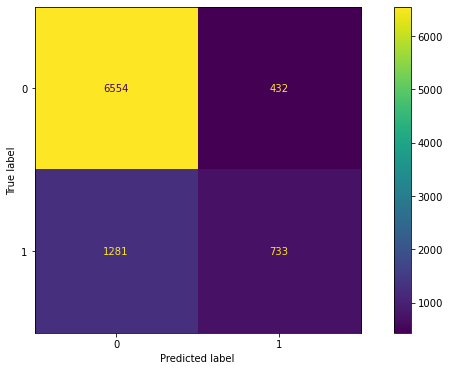

In [139]:
rf=RandomForestClassifier(random_state=25)
rfmodel=rf.fit(xtrain,ytrain)

scores(rfmodel)

In [140]:
update_score_card('Random Forest',rfmodel)

<AxesSubplot:xlabel='0', ylabel='Features'>

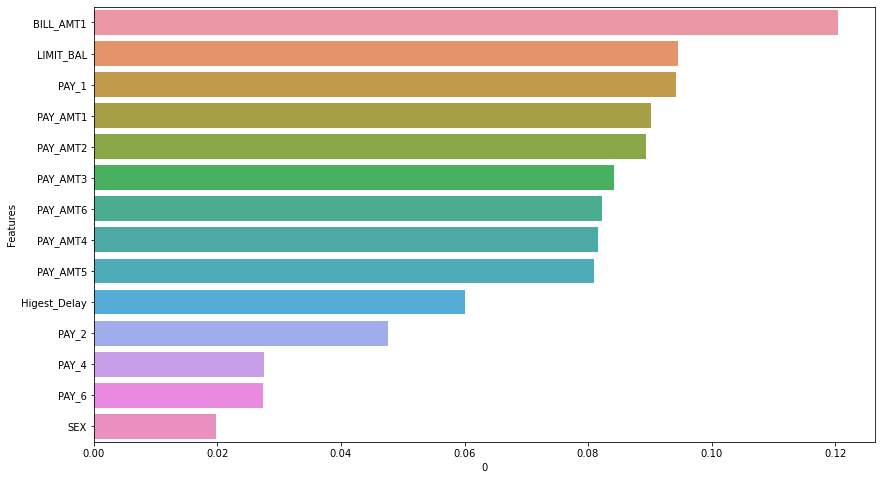

In [141]:
important_features=pd.DataFrame(rfmodel.feature_importances_)
important_features['Features']=xtrain.columns
important_features.sort_values(by=0,ascending=False)
important_features=important_features.sort_values(by=0,ascending=False)
important_features
plt.figure(figsize=(14,8))
sns.barplot(data=important_features,x=0,y='Features')

Train_Accuracy_Score: 0.821
Test_Accuracy_Score: 0.816


roc_auc_score: 0.642


Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      6986
           1       0.69      0.33      0.44      2014

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



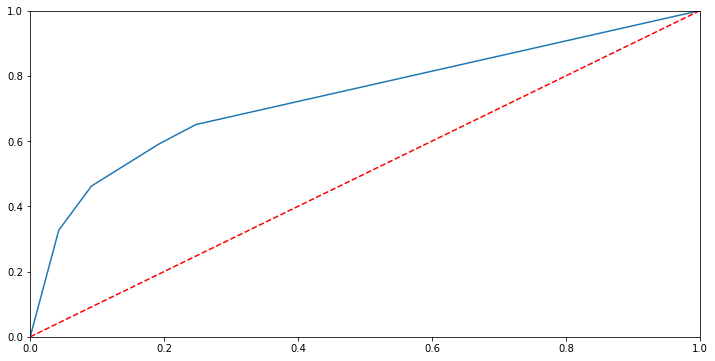

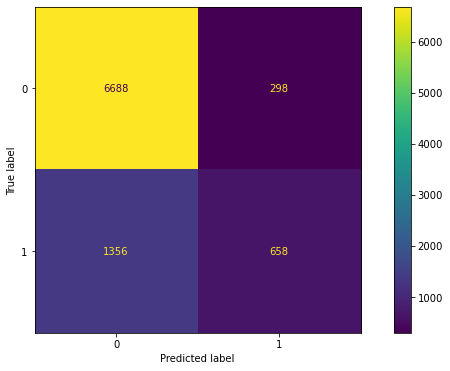

In [142]:
adb=AdaBoostClassifier(random_state=25,learning_rate=0.01)
ada_model=adb.fit(xtrain,ytrain)

scores(ada_model)

In [143]:
update_score_card('AdaBoostClassifier',ada_model)

Train_Accuracy_Score: 0.827
Test_Accuracy_Score: 0.818


roc_auc_score: 0.65


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6986
           1       0.69      0.35      0.46      2014

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000



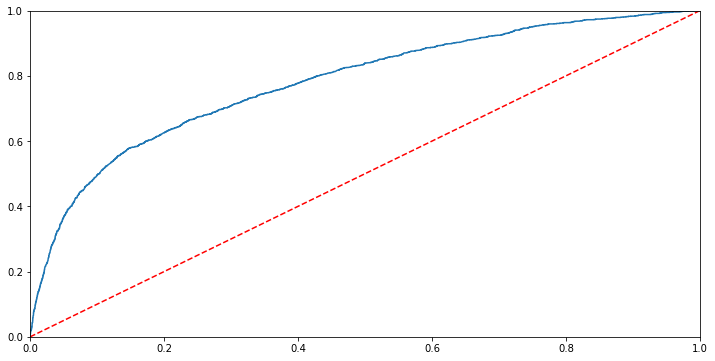

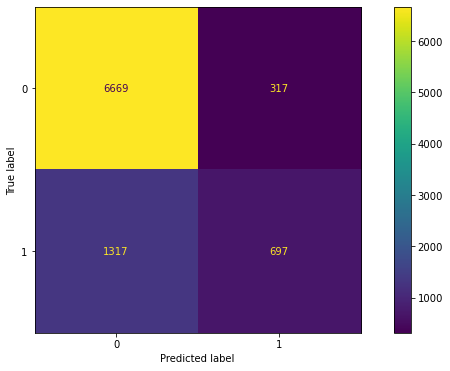

In [144]:
gb=GradientBoostingClassifier(random_state=25)
gb_model=gb.fit(xtrain,ytrain)

scores(gb_model)

In [147]:
update_score_card('GradientBoostingClassifier',gb_model)

In [151]:
! pip install xgboost

In [152]:
from xgboost import XGBClassifier

Train_Accuracy_Score: 0.881
Test_Accuracy_Score: 0.813


roc_auc_score: 0.649


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6986
           1       0.65      0.35      0.46      2014

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



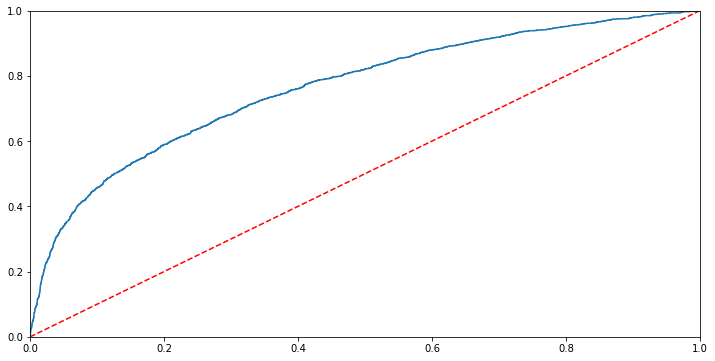

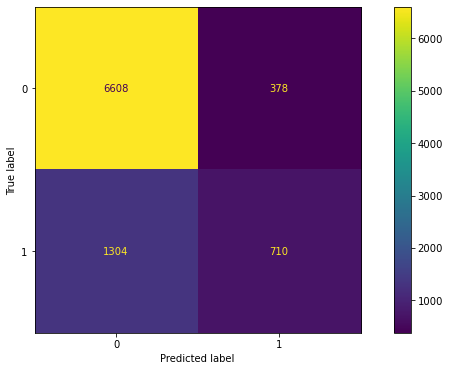

In [153]:
xgb=XGBClassifier(random_state=25)
xgb_model=xgb.fit(xtrain,ytrain)

scores(xgb_model)

In [154]:
update_score_card('XGBClassifier',xgb_model)

In [155]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.000000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.408640,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.705000,0.760000,0.650000,0.7500
3,KNN,0.780000,0.776222,0.645000,0.920000,0.370000,0.7800
4,Decision Tree with tuning,0.824476,0.815111,0.647143,0.951188,0.343098,0.7914
5,KNN with tuning,0.797714,0.798778,0.649344,0.940000,0.370000,0.7900
6,Gaussian Naive Bayes with Tuning,0.778952,0.775667,0.704000,0.830000,0.580000,0.7800
7,Random Forest,0.991762,0.809667,0.651057,0.938162,0.363952,0.7897
8,AdaBoostClassifier,0.821048,0.816222,0.642028,0.957343,0.326713,0.7900
9,GradientBoostingClassifier,0.826619,0.818444,0.650350,0.954624,0.346077,0.7945


## Random Forest Tuning

In [ ]:
rf=RandomForestClassifier(random_state=25,max_depth=13,max_features=0.75,min_samples_leaf=30,min_samples_split=20,
                          n_estimators=500)
rfmodel=rf.fit(xtrain,ytrain)

scores(rfmodel)

In [ ]:
update_score_card('RandomForestClassifier with Tuning',rfmodel)

## GBM Tuning

In [ ]:
gb=GradientBoostingClassifier(random_state=25,max_depth=8,max_features=1,min_samples_leaf=10,min_samples_split=20,
                          n_estimators=60,learning_rate=0.1)
gb_model=gb.fit(xtrain,ytrain)

scores(gb_model)

In [ ]:
update_score_card('GradientBoostingClassifier with Tuning',gb_model)

[18:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train_Accuracy_Score: 0.833
Test_Accuracy_Score: 0.818


roc_auc_score: 0.652


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6986
           1       0.68      0.35      0.46      2014

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000



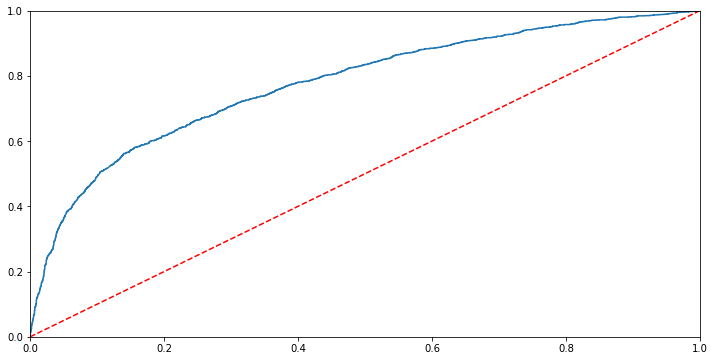

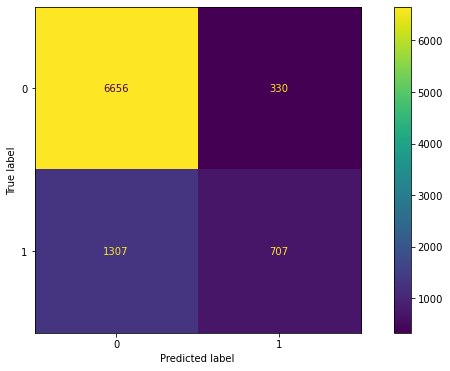

In [157]:
xgb=XGBClassifier(random_state=25,gamma=1,learning_rate=0.2,max_depth=4,n_estimator=50)
xgb_model=xgb.fit(xtrain,ytrain)

scores(xgb_model)

In [158]:
update_score_card('XGBClassifier with Tuning',xgb_model)

In [159]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,Logistic Regression,0.779905,0.776222,0.500000,1.000000,0.000000,0.6784
1,Decision Tree,0.991810,0.728333,0.614569,0.820498,0.408640,0.7298
2,Gaussian Naive Bayes,0.779571,0.776333,0.705000,0.760000,0.650000,0.7500
3,KNN,0.780000,0.776222,0.645000,0.920000,0.370000,0.7800
4,Decision Tree with tuning,0.824476,0.815111,0.647143,0.951188,0.343098,0.7914
5,KNN with tuning,0.797714,0.798778,0.649344,0.940000,0.370000,0.7900
6,Gaussian Naive Bayes with Tuning,0.778952,0.775667,0.704000,0.830000,0.580000,0.7800
7,Random Forest,0.991762,0.809667,0.651057,0.938162,0.363952,0.7897
8,AdaBoostClassifier,0.821048,0.816222,0.642028,0.957343,0.326713,0.7900
9,GradientBoostingClassifier,0.826619,0.818444,0.650350,0.954624,0.346077,0.7945
